In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import datetime 
import numpy as np

In [5]:
# Next, I will be downloading the data and setting the date range.
start = datetime.datetime(2024, 1, 1)
end = datetime.datetime(2025, 4, 30)

# Download data
nestle = yf.download("NSRGY", start=start, end=end)


[*********************100%***********************]  1 of 1 completed


In [6]:
# Calculating daily return, moving averages, and volatility. This also means creating new columns that will display the result from the calculations.
nestle['Daily Return'] = nestle['Close'].pct_change()

nestle['SMA_7'] = nestle['Close'].rolling(window=7).mean()
nestle['SMA_14'] = nestle['Close'].rolling(window=14).mean()

nestle['Volatility_7'] = nestle['Daily Return'].rolling(window=7).std()
nestle.dropna(inplace=True)


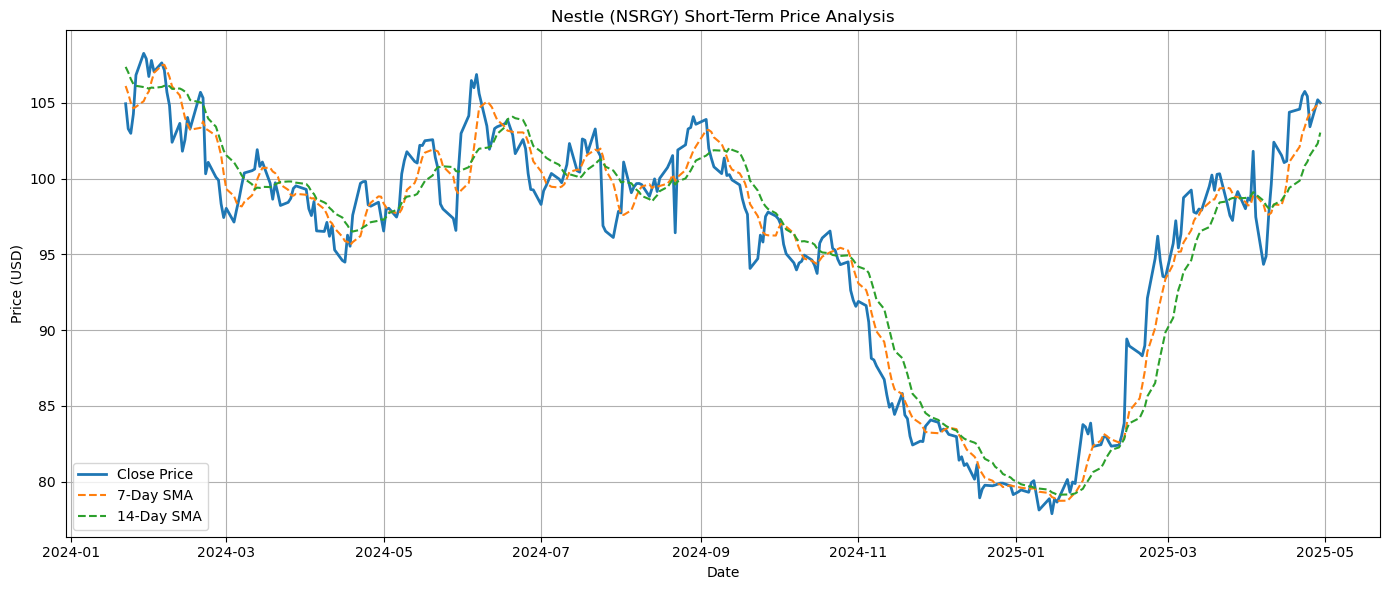

In [7]:
# Plotting the calculated values in order to preview them before exporting them to Tableau.

plt.figure(figsize=(14, 6))
plt.plot(nestle['Close'], label='Close Price', linewidth=2)
plt.plot(nestle['SMA_7'], label='7-Day SMA', linestyle='--')
plt.plot(nestle['SMA_14'], label='14-Day SMA', linestyle='--')
plt.title('Nestle (NSRGY) Short-Term Price Analysis')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





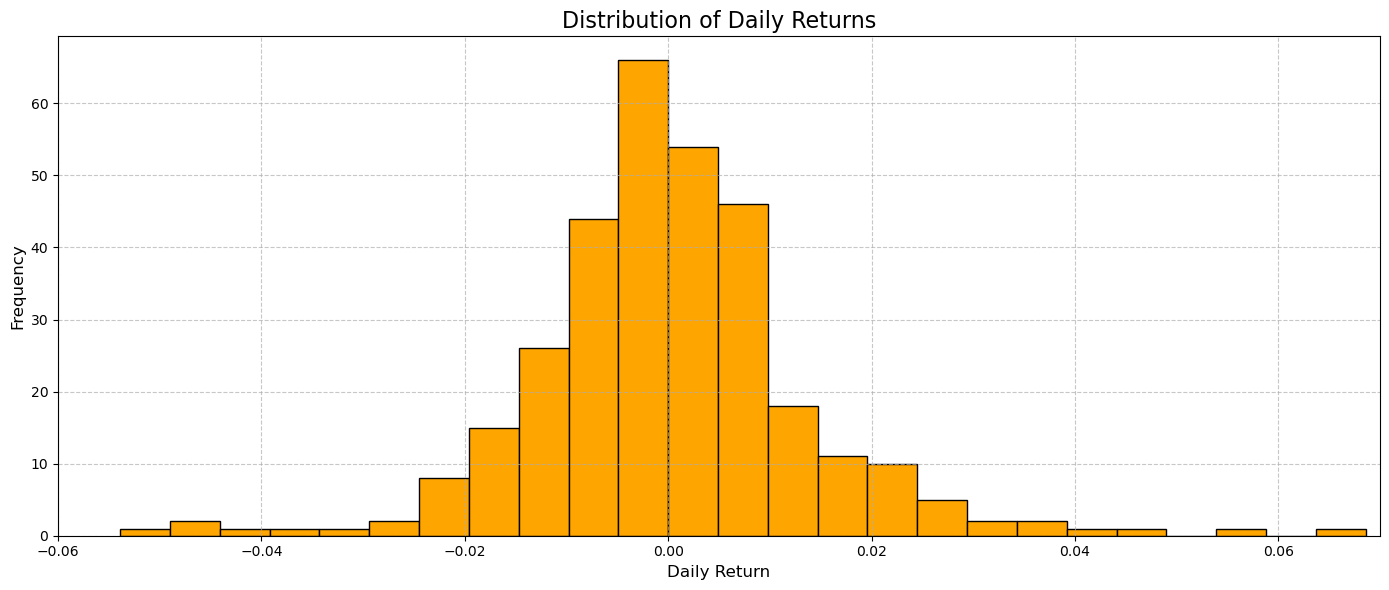

In [14]:
# In order to make my diagram in Python and Tableau match, I had to use the bin size in Tableau.
B1 = 0.0049
S1 = -0.0502 # Actual minimum value of my data in Tableau
M1 = 0.0663  # Actual maximum value of my data in Tableau

lowest_bin_edge = np.floor(S1 / B1) * B1
highest_bin_edge_exclusive = np.ceil(tableau_max_data / tableau_bin_size) * tableau_bin_size + tableau_bin_size
bins = np.arange(lowest_bin_edge, highest_bin_edge_exclusive, tableau_bin_size)

plt.figure(figsize=(14, 6)) 
plt.hist(nestle['Daily Return'],bins=bins,edgecolor='black',color='orange')
plt.title('Distribution of Daily Returns', fontsize=16) 
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7) 
plt.xlim(-0.06, 0.07)
plt.tight_layout() 
plt.show()

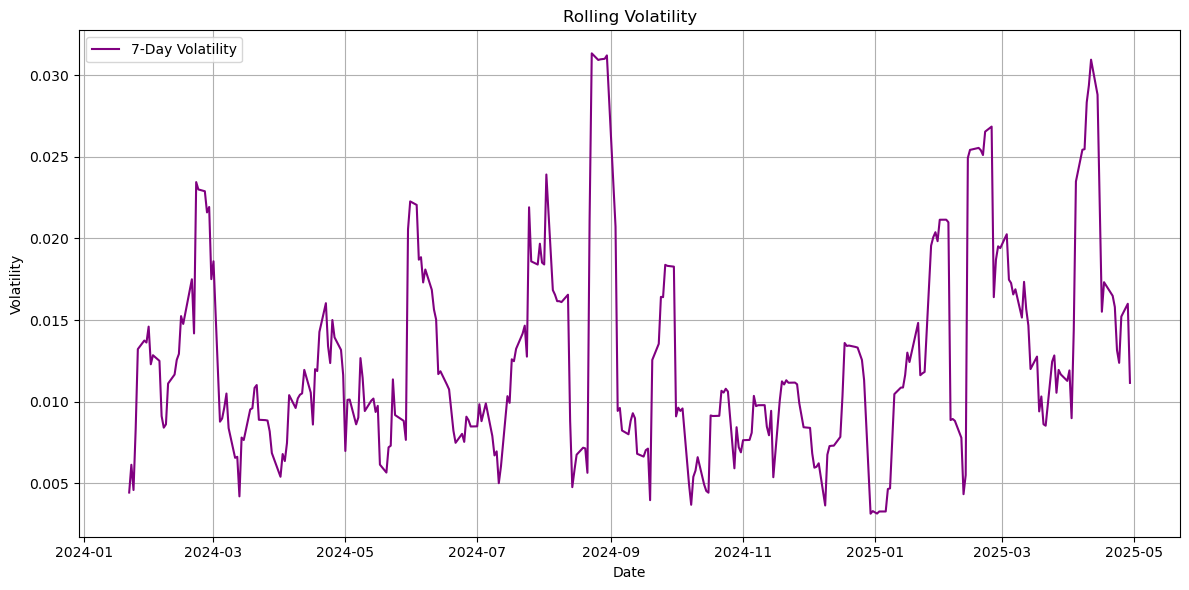

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(nestle['Volatility_7'], label='7-Day Volatility', color='purple')
plt.title('Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


nestle.to_csv('nestle_stock_analysis.csv')
